In [23]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Another example of A/B testing: Casuality

### A reminder of the difference between `Experiments` and `Observational Studies`.

**Example**

Alejandro owns a restaurant where he sells pizza by the slice. He wonders if customers prefer their pepperoni on top of the cheese or under the cheese. Every day for a week, he prepares both types of pizza. 

Every time a customer orders a slice of pepperoni pizza, he flips a coin to determine whether he'll give the customer a slice with pepperoni on top or under the cheese.

He then asked each customer to rate their pizza. At the end of the week, he found that customers who received pepperoni on top rated their pizza significantly better on average than customers who received pepperoni under the cheese.


What conclusion can they draw from this study?

    [a] Customer ratings caused the difference in pepperoni placement.

    [b] Pepperoni placement caused the difference in customer ratings.

    [c] Any customer would prefer pepperoni on top of the cheese.

    [d] Any other pizza restaurant should put their pepperoni on top of the cheese.

    [e] There was an association between pepperoni placement and customer rating, but it's not necessarily a causal relationship.

**The Take-Away**

_Since the treatment and control groups are assigned randomly in such experiments, differences in their outcomes can be compared to what would happen just due to chance if the treatment had no effect at all._

_If the observed differences are more marked than what we would predict as purely due to chance, we will have evidence of causation. Because of the unbiased assignment of individuals to the treatment and control groups, differences in the outcomes of the two groups can be ascribed to the treatment._

## Observational Study

**Example**

A survey of over 7,000 randomly selected employees in 15 nations recently showed that employees who work in a digital workplace tended to be happier than those who don't work in a digital workplace.


Can we conclude that working in a digital workplace caused employees to be happier? Why?

    [a] Yes, because the sample size was large.

    [b] Yes, because the employees were randomly selected.

    [c] Yes, because the employees were randomly assigned.

    [d] Not necessarily, because the sample size was too small.

    [e] Not necessarily, because this wasn't an experiment.

**The Take-Away**

_This was an observational study since employees were not randomly assigned to a workplace, so we can't say that working in a digital workplace necessarily caused the employees to be happier._

_In general, observational studies can provide evidence of a naturally occurring association between variables, but they cannot by themselves show a causal connection._

## Application of A/B TESTING to Randomized Controlled Experiments

## Context of the data set

Swimming with dolphins can certainly be fun, _but is it also therapeutic for patients suffering from clinical depression?_ 

**Experimental Design**

To investigate this possibility, researchers recruited 30 subjects aged 18–65 with a clinical diagnosis of mild to moderate depression. Subjects were required to discontinue use of any antidepressant drugs or psychotherapy four weeks prior to the experiment, and throughout the experiment. These 30 subjects went to an island off the coast of Honduras, where they were randomly assigned to one of two treatment groups. 



Both groups engaged in the same amount of swimming and snorkeling each day, but one group did so in the presence of bottlenose dolphins(_Dolphin group_) and the other group did not(_No Dolphin group_). 


At the end of two weeks, each subjects’ level of depression was evaluated, as it had been at the beginning of the study, and it was determined whether they showed substantial improvement (reducing their level of depression) by the end of the study.


## Research Question

Does this data support the claim that swimming with dolphins is therapeutic for patients suffering from clinical depression?

### Dolphin Therapy

- In the Dolphin Group:
        10 of the 13 patients showed substantial improvement
        
- In the Control Group: 
        3 of the 12 patients showed substantial improvement
        

- 5 of the patients dropped off during the study.

In our sample the difference(observed test statistic) between the groups was:

$\hat{p}=\hat{p}_D-\hat{p}_{N D}=\frac{10}{13}-\frac{3}{12} \approx 0.52$

**How different would the groups be by chance if the Dolphin Therapy had no influence over improvements in depression?**

In [24]:
# let us create the data set. We do not have the raw data set.
# Create the Categorical variable(Therapy) for whether patient is in the "Dolphin" or "No Dolphin" group

Therapy = np.append(
    np.repeat('Dolphin', 13), 
    np.repeat('No Dolphin', 12)
)

Therapy

array(['Dolphin', 'Dolphin', 'Dolphin', 'Dolphin', 'Dolphin', 'Dolphin',
       'Dolphin', 'Dolphin', 'Dolphin', 'Dolphin', 'Dolphin', 'Dolphin',
       'Dolphin', 'No Dolphin', 'No Dolphin', 'No Dolphin', 'No Dolphin',
       'No Dolphin', 'No Dolphin', 'No Dolphin', 'No Dolphin',
       'No Dolphin', 'No Dolphin', 'No Dolphin', 'No Dolphin'],
      dtype='<U10')

In [25]:
# Define an indicator(binary) variable with two levels.
# 1 = Improvement, 0 = No Improvement

Improvement = np.append(
    np.append(np.repeat(1, 10), np.repeat(0, 3)),
    np.append(np.repeat(1, 3), np.repeat(0, 9))
)

Improvement    

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
# Combine both columns

dolphin = Table().with_columns(
    'Therapy', Therapy,
    'Improvement', Improvement
)

dolphin.show()

Therapy,Improvement
Dolphin,1
Dolphin,1
Dolphin,1
Dolphin,1
Dolphin,1
Dolphin,1
Dolphin,1
Dolphin,1
Dolphin,1
Dolphin,1


**Some Descriptive Statistics**

We consider the count of how many mothers are in the two groups.

In [27]:
dolphin.group('Therapy')

Therapy,count
Dolphin,13
No Dolphin,12


**Some Descriptive Statistics - Visualization of the levels of a categorical variable**

We use a bar chart. 

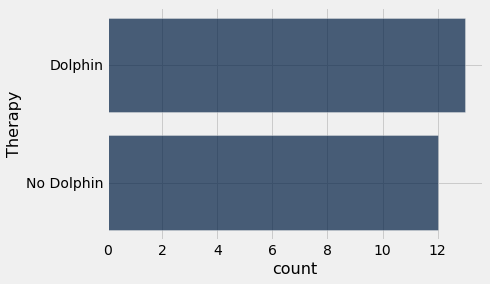

In [28]:
dolphin.group('Therapy').barh('Therapy')

**Some Descriptive Statistics**

We consider the **proportion** of pateints who improved in each of the two groups.

**Hypothesis Testing**

- A test chooses between two views of how data were generated

- The views are called hypotheses: **The Null and the Alternative Hypotheses.**

- The test picks the hypothesis that is better supported by the observed data


**_In this example..._**

## Step 1: Setting up the null and alternative hypotheses for this application problem:

**Null Hypothesis:**

In the population, the proportion of patients of who showed improvements in depression symptoms in the DOLPHIN group is the same as the proportion of patients of who showed improvements in depression symptoms in the NO DOLPHIN group. The difference in the sample is due to chance (whether a patient swins with a dolphin or not does not make any difference in in the incidence of improvements).

**Alternative Hypothesis:**

In the population, the proportion of patients of who showed improvements in depression symptoms in the DOLPHIN group is greater than the proportion of patients of who showed improvements in depression symptoms in the NO DOLPHIN group. 



## Step 2: Define The Test Statistic and Compute the Observed Value of the Test Statistic

Because we are comparing how effective the dolphin therapy treatment is to those whi did not swim in the therapy group, it makes natural sense that the test statistic should be the difference between the proportions of those who showed improvements in both groups.

#### Compute the Observed Value of the Test Statistic

In [29]:
dolphin_summary = dolphin.group('Therapy', np.mean)
dolphin_summary

Therapy,Improvement mean
Dolphin,0.769231
No Dolphin,0.25


In [30]:
obs_diff_prop = dolphin_summary.column(1).item(0) - dolphin_summary.column(1).item(1)
obs_diff_prop

0.5192307692307693

In [31]:
def difference_of_props(table, group_label, outcome):
    """Takes: name of table, column label of binary categorical variable,
    column label of group-label variable
    Returns: Difference of proportions of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(outcome, group_label)  
    
    # table containing counts for each group
    summary_table = reduced.group(group_label, np.mean)
    
    return summary_table.column(1).item(0) - summary_table.column(1).item(1)

In [32]:
difference_of_props(dolphin, 'Therapy', 'Improvement')

0.5192307692307693

## Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis

Recall the null hypothesis: 

**Null Hypothesis:**


In the population, the proportion of patients of who showed improvements in depression symptoms in the DOLPHIN group is the same as the proportion of patients of who showed improvements in depression symptoms in the NO DOLPHIN group. The difference in the sample is due to chance (whether a patient swins with a dolphin or not does not make any difference in in the incidence of improvements).


**How should we simulate test statistic under the null hypothesis?**

## Use the permutation test to conduct the simulation.

In our sample the difference between the groups was:
$$
\hat{p}=\hat{p}_D-\hat{p}_{N D}=\frac{10}{13}-\frac{3}{12} \approx 0.52
$$
How different would the groups be by chance if the Dolphin Therapy had no influence over improvements in depression?

In [33]:
shuffled_labels = dolphin.sample(with_replacement=False).column('Therapy')
shuffled_labels

array(['Dolphin', 'No Dolphin', 'No Dolphin', 'Dolphin', 'Dolphin',
       'Dolphin', 'No Dolphin', 'Dolphin', 'Dolphin', 'Dolphin',
       'No Dolphin', 'Dolphin', 'No Dolphin', 'Dolphin', 'Dolphin',
       'Dolphin', 'No Dolphin', 'Dolphin', 'Dolphin', 'No Dolphin',
       'No Dolphin', 'No Dolphin', 'No Dolphin', 'No Dolphin', 'No Dolphin'],
      dtype='<U10')

In [34]:
original_and_shuffled = dolphin.with_column(
    'Shuffled Label', shuffled_labels
)

original_and_shuffled

Therapy,Improvement,Shuffled Label
Dolphin,1,Dolphin
Dolphin,1,No Dolphin
Dolphin,1,No Dolphin
Dolphin,1,Dolphin
Dolphin,1,Dolphin
Dolphin,1,Dolphin
Dolphin,1,No Dolphin
Dolphin,1,Dolphin
Dolphin,1,Dolphin
Dolphin,1,Dolphin


In [35]:
difference_of_props(original_and_shuffled, 'Shuffled Label', 'Improvement')

0.5192307692307693

In [36]:
def one_simulated_difference(table, group_label, outcome):
    """Takes: name of table, column label of binary cateogorcial variable,
    column label of group-label variable
    Returns: Difference of proportions of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of outcome variable and shuffled labels
    shuffled_table = table.select(outcome).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_props(shuffled_table, 'Shuffled Label', outcome)  

In [37]:
one_simulated_difference(dolphin, 'Therapy', 'Improvement')

0.19871794871794873

In [38]:
differences = make_array()

for i in np.arange(10000):
    new_difference = one_simulated_difference(dolphin, 'Therapy', 'Improvement')
    differences = np.append(differences, new_difference)

Observed Difference: 0.5192307692307693


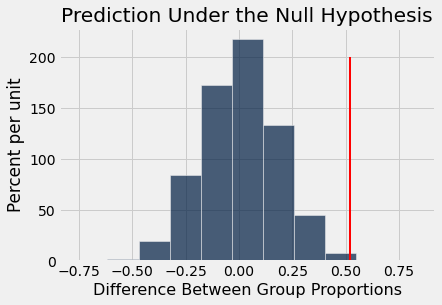

In [39]:
Table().with_column('Difference Between Group Proportions', differences).hist(bins=11)
print('Observed Difference:', obs_diff_prop)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([obs_diff_prop, obs_diff_prop], [0, 2], color='red', lw=2);

In [40]:
p_value = sum(differences>= obs_diff_prop)/10000
p_value

0.0132

## Step 4. The Conclusion of the Test

The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.


IN THIS EXAMPLE, since the p-value above is smaller than a chosen p-value cut-off of 0.05, we REJECT the null hypothesis in favor of the alternative hypothesis. This means that the results of the hypothesis testing procedure provides a statistically significant evidence to state that the proportion of patients of who showed improvements in depression symptoms in the DOLPHIN group is greater than the proportion of patients of who showed improvements in depression symptoms in the NO DOLPHIN group


Formally, we say that `the result of the test is statistically significant.` 